# Data visualization of electronic structure

James K. Glasbrenner

---

## Load packages

In [1]:
%matplotlib widget

from pathlib import Path

import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import plotly.offline as py

import dataviz.data
import dataviz.visualizations

## Import data

Set the relative paths to the density of states and bands data, which are stored in the CSV file format.

In [2]:
data_dir = Path("../../data/")
bands_csv = data_dir / "csv/bands.csv"
dos_csv = data_dir / "csv/dos.csv"

Read the CSV files directly into a [pandas](https://pandas.pydata.org/) data frame for easy manipulation.

In [3]:
dos_df = pd.read_csv(dos_csv)
bands_df = pd.read_csv(bands_csv)

## DFT calculation notes

Below are quick notes about the parameters used to generate the density of states and bands data.

### Material

The electronic structure of iron was calculated using the [ELK](http://elk.sourceforge.net/) DFT software. At room temperature, iron has the following crystal structure:

| Keyword           | Value                |
| ----------------- | -------------------- |
| Structure         | Body-centered cubic  |
| Spacegroup        | Im-3m (229)          |
| Lattice constants | a = 2.8665 Å         |
| Basis             | Fe: [0.00 0.00 0.00] |

The electronic structure was solved for three magnetic patterns: nonmagnetic (unpolarized), ferromagnetic, and antiferromagnetic checkerboard (G type).

In [4]:
mag_order_list = ["nonmagnetic", "ferromagnetic", "g-type"]

### DOS calculation

We used the following parameters in the `elk.in` file for generating the DOS plots:

    wplot
      1000  150  1
      -1.0  1.0

### Bandlines calculation

We used the following parameters in the `elk.in` file for drawing the band lines:

    plot1d
      8  200
      0.000000 0.000000 0.000000       : \Gamma
      0.500000 -0.500000 0.500000       : H
      0.000000 0.000000 0.500000       : N
      0.000000 0.000000 0.000000       : \Gamma
      0.250000 0.250000 0.250000       : P
      0.500000 -0.500000 0.500000       : H
      0.250000 0.250000 0.250000       : P
      0.000000 0.000000 0.500000       : N

## Density of states visualizations

### Plotly version

This interactive plot is based on the [plotly](https://plot.ly/) package, a visualization library for scientific data. Plotly itself is based on [D3.js](https://d3js.org/), which is well-known for producing elegant and beautiful visualizations in the web browser.

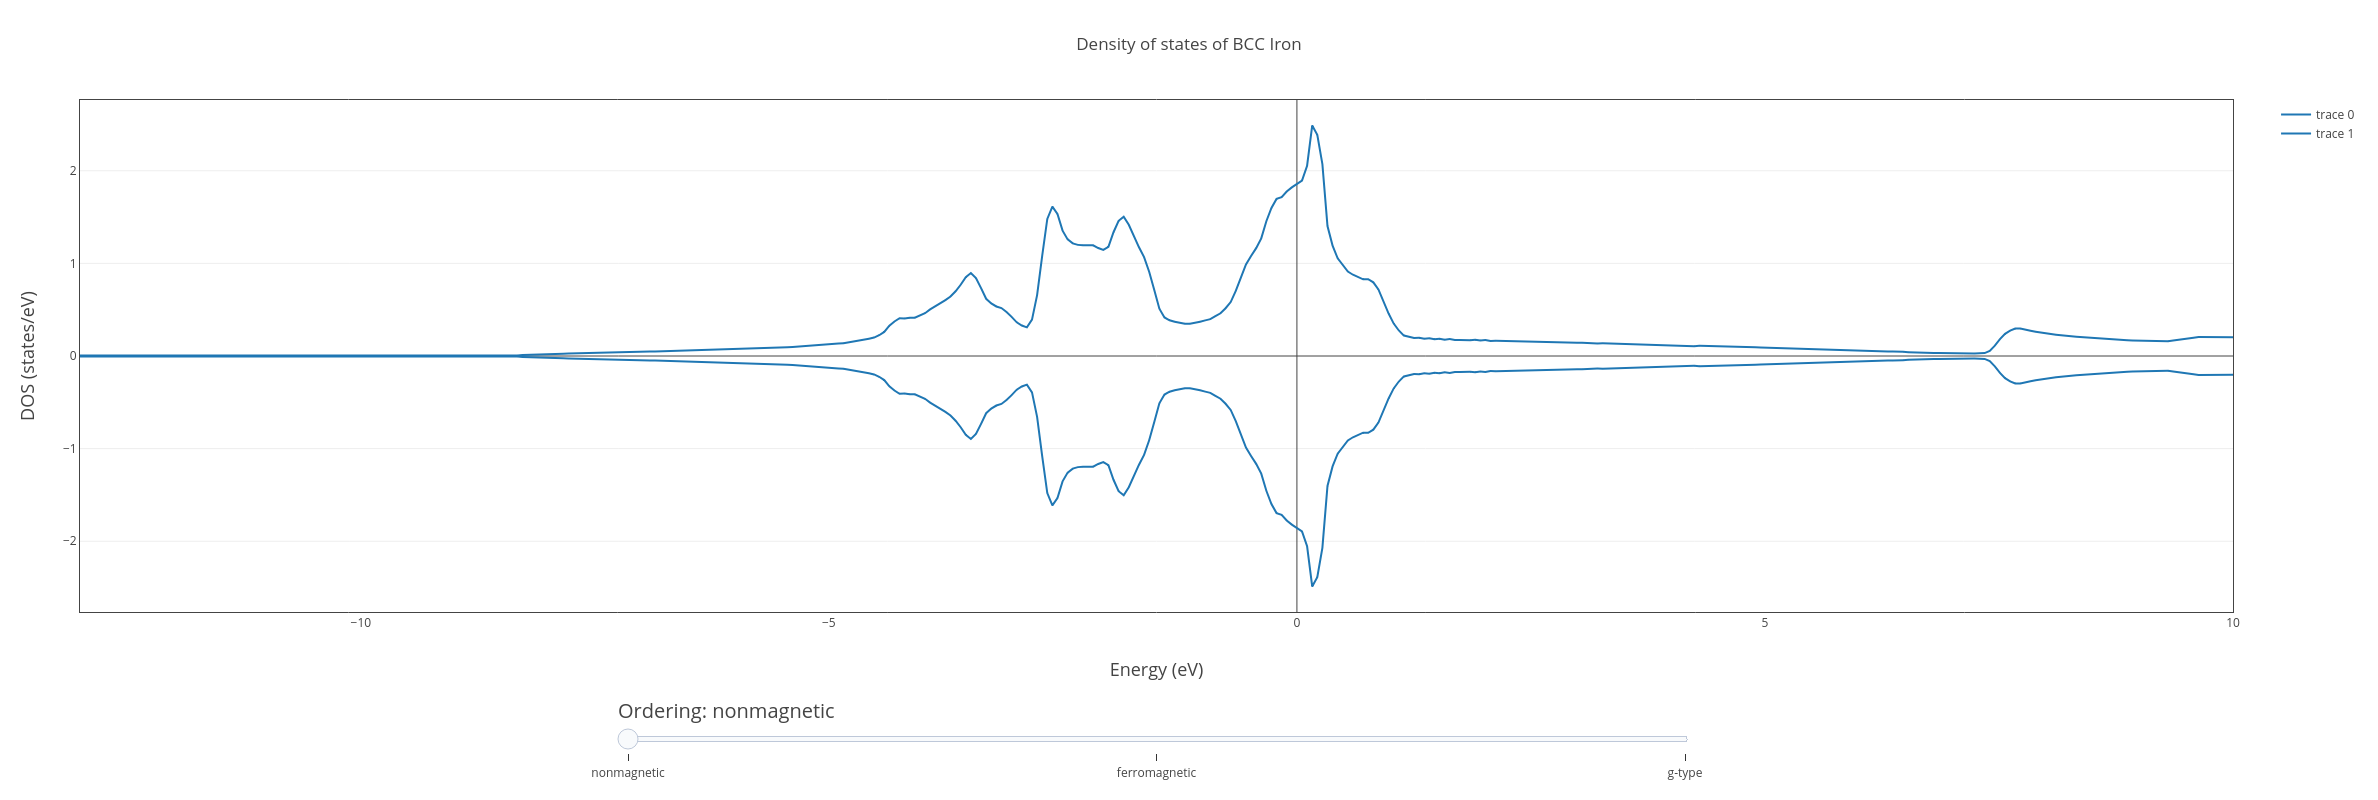

In [5]:
# Initialize offline mode for plotly
py.init_notebook_mode(connected=True)

# Load the visualization
dataviz.visualizations.visualize_dos_with_plotly(
    df=dos_df,
    mag_order_list=mag_order_list
)

### Matplotlib version

This interactive plot is based on the [Matplotlib](https://matplotlib.org/) package, a well-known visualization library for Python. By default, Matplotlib visualizations are static, so additional packages are needed to make things interactive. The [Jupyter widgets](https://ipywidgets.readthedocs.io/en/stable/index.html) package was used to create the interactive inputs (input boxes, radio buttons, sliders, etc.). [jupyter-matplotlib](https://github.com/matplotlib/jupyter-matplotlib) is used to make the matplotlib plot window more interactive, allowing you to scroll and pan without re-running the plot.

In [6]:
# Load the visualization
dataviz.visualizations.visualize_dos_with_matplotlib(
    df=dos_df,
    xmin=-9,
    xmax=5,
    mag_order_list=mag_order_list,
    update_function=dataviz.visualizations.update_matplotlib_dos_plot
)

interactive(children=(FloatText(value=-9.0, description='Energy minimum'), FloatText(value=5.0, description='E…